# TERLS test radar
---
- author: Hamid Syed
- <a href="https://twitter.com/hamidrixvi" target="_blank">@hamidrixvi</a>
- date: Nov 14, 2022
---

In [2]:
import xarray as xr
import datetime as dt
import pyart
import numpy as np
import wradlib as wrl
# import pyscancf as pcf
import netCDF4 as nc
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter, FuncFormatter
import pandas as pd
from matplotlib import axes
from matplotlib.ticker import NullFormatter
import cartopy.crs as ccrs
import cartopy.feature as feat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import glob

In [3]:
files = glob.glob("RC*nc")
files

['RCTLS_30NOV2017_000100_L2B_STD.nc']

***Note:*** Since this datafile was not compatible for pyart, I used lrose-Radx to convert it to cfradial

In [4]:
for file in files:
    !RadXConvert -const_ngates -f $file -outdir ./output1

Program 'RadxConvert'
Run-time 2022/11/14 07:06:18.

Copyright (c) 1992 - 2022
University Corporation for Atmospheric Research (UCAR)
National Center for Atmospheric Research (NCAR)
Boulder, Colorado, USA.

Redistribution and use in source and binary forms, with
or without modification, are permitted provided that the following
conditions are met:

1) Redistributions of source code must retain the above copyright
notice, this list of conditions and the following disclaimer.

2) Redistributions in binary form must reproduce the above copyright
notice, this list of conditions and the following disclaimer in the
documentation and/or other materials provided with the distribution.

3) Neither the name of UCAR, NCAR nor the names of its contributors, if
any, may be used to endorse or promote products derived from this
software without specific prior written permission.

4) If the software is modified to produce derivative works, such modified
software should be clearly marked, so as not to 

In [5]:
ls output1/20171130/

cfrad.20171130_000100.056_to_20171130_000819.944_None_SUR.nc


In [6]:
radar = pyart.io.read("output1/20171130/cfrad.20171130_000100.056_to_20171130_000819.944_None_SUR.nc")

In [7]:
radar.scan_type = "ppi"

In [8]:
display = pyart.graph.RadarMapDisplay(radar)

In [9]:
phidp0 = radar.fields['PHIDP']['data'][radar.get_slice(0)]
x,y,z = radar.get_gate_x_y_z(0)

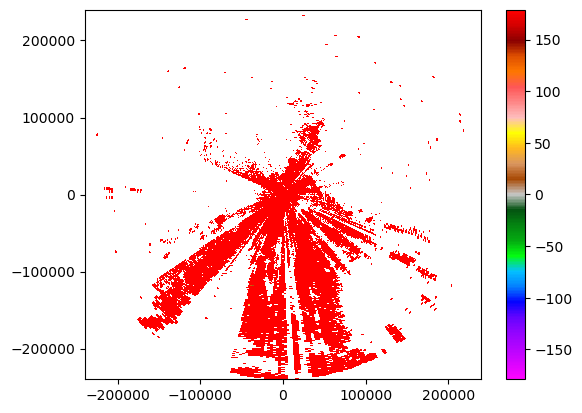

In [10]:
plt.pcolormesh(x,y,phidp0, cmap = "pyart_Wild25", vmin = -179, vmax = 179)
plt.colorbar()

In [11]:
radar.fields['PHIDP']['data'].max(), radar.fields['PHIDP']['data'].min()

(65535.0, 0.99997085)

In [12]:
vol = wrl.io.open_cfradial1_dataset("output/20171130/cfrad.20171130_000100.056_to_20171130_000819.944_None_SUR.nc")

In [13]:
vol

<wradlib.RadarVolume>
Dimension(s): (sweep: 11)
Elevation(s): (0.5, 1.0, 2.0, 3.0, 4.0, 7.0, 9.0, 12.0, 15.0, 18.0, 20.9)

In [14]:
swp0 = vol[0].pipe(wrl.georef.georeference_dataset)

In [15]:
cmap = pyart.graph.cm_colorblind.HomeyerRainbow

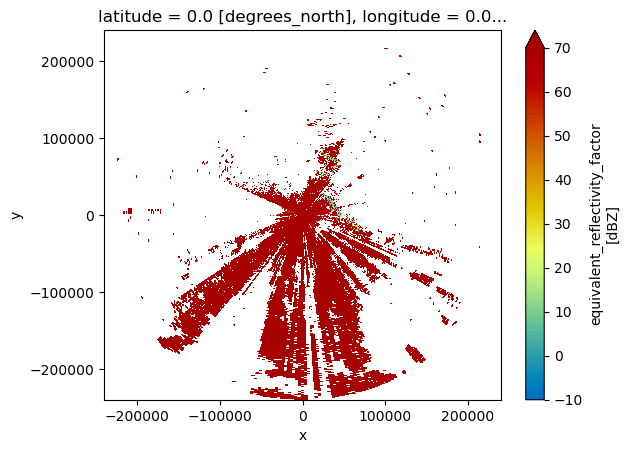

In [16]:
swp0.DBZ.plot(x = "x", y="y", cmap = cmap, vmin = -10, vmax = 70)

In [17]:
vol2 = wrl.io.open_cfradial2_dataset("RCTLS_30NOV2017_000100_L2B_STD.nc", group = "sweep_0")

In [18]:
vol2.RHOHV.max().values

array(1., dtype=float32)

In [19]:
vol2.PHIDP.max().values, vol2.PHIDP.min().values, vol2.PHIDP.median().values, vol2.PHIDP.std().values

(array(5587.08, dtype=float32),
 array(-179.912, dtype=float32),
 array(32.168, dtype=float32),
 array(1040.885, dtype=float32))

I guess this method should work for you. Its RHOHV values are somewhere equal to 1, which is not usual

In [20]:
swp = vol2.where((vol2.PHIDP<=179) & (vol2.RHOHV<=0.99)).pipe(wrl.georef.georeference_dataset)

In [22]:
swp['x'] /= 1000
swp['y'] /= 1000
swp['z'] /= 1000

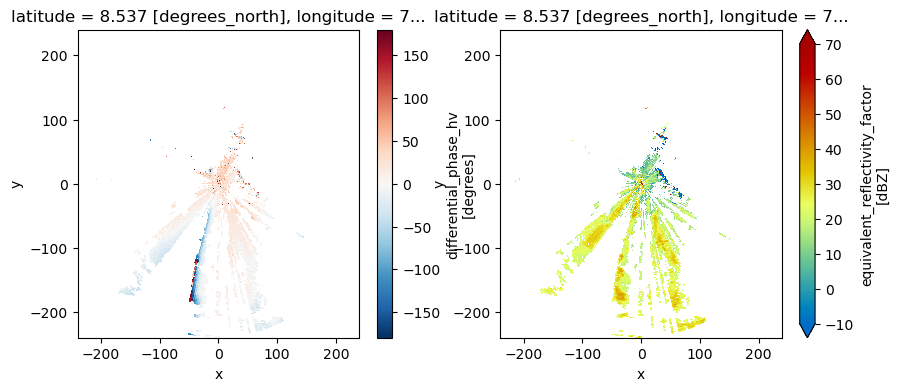

In [23]:
fig = plt.figure(figsize = [10,4])
ax = plt.subplot(121)
swp.PHIDP.plot(x="x", y = "y")
ax = plt.subplot(122)
swp.DBZ.plot(x="x", y = "y", vmin = -10, vmax = 70, cmap = cmap)